In [115]:
%pylab inline
import numpy as np
import astropy 
import k3d
from astropy.io import fits
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import Angle
plt.style.use('~/Work/research/MW_viz/matplotlib.mplstyle')

Populating the interactive namespace from numpy and matplotlib


In [2]:
#sats_data = fits.util.get_testdata_filepath('../data/NearbyGalaxies_Jan2021_PUBLIC.fits')

LV_galaxies = fits.open('../data/NearbyGalaxies_Jan2021_PUBLIC.fits')

In [3]:
LV_galaxies.info()

Filename: ../data/NearbyGalaxies_Jan2021_PUBLIC.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (5262,)   uint8   
  1  Joined        1 BinTableHDU    125   144R x 49C   [16A, 10A, 11A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, 53A]   


In [5]:
#LV_galaxies[1].header

In [7]:
data = LV_galaxies[1].data
LV_gal_names = data['GalaxyName']
LV_gal_RA = data['RA']
LV_gal_DEC = data['Dec']
LV_gal_dmod = data['dmod']
LV_gal_rh = data['rh']

In [9]:
LV_gal_names

chararray(['*Bootes3', '*CanisMajor', '*Cetus2', '*Columba1', '*Draco2',
           '*Eridanus3', '*Grus1', '*Grus2', '*Horologium1',
           '*Horologium2', '*Hydra1', '*Indus1', '*Indus2', '*Pegasus3',
           '*Phoenix2', '*Pictor1', '*Reticulum2', '*Reticulum3',
           '*Sagittarius2', '*Triangulum2', '*Tucana3', '*Tucana4',
           '*Tucana5', 'AndromedaI', 'AndromedaII', 'AndromedaIII',
           'AndromedaIX', 'AndromedaV', 'AndromedaVI', 'AndromedaVII',
           'AndromedaX', 'AndromedaXI', 'AndromedaXII', 'AndromedaXIII',
           'AndromedaXIV', 'AndromedaXIX', 'AndromedaXV', 'AndromedaXVI',
           'AndromedaXVII', 'AndromedaXVIII', 'AndromedaXX',
           'AndromedaXXI', 'AndromedaXXII', 'AndromedaXXIII',
           'AndromedaXXIV', 'AndromedaXXIX', 'AndromedaXXV',
           'AndromedaXXVI', 'AndromedaXXVII', 'AndromedaXXVIII',
           'AndromedaXXX', 'AndromedaXXXI', 'AndromedaXXXII',
           'AndromedaXXXIII', 'Antlia', 'Antlia2', 'AntliaB', 

In [11]:
dsat = (10**(LV_gal_dmod/5 + 1)) * u.pc

In [21]:
RA = Angle(list(LV_gal_RA), 'hourangle')

In [22]:
DEC = Angle(list(LV_gal_DEC), 'deg')

In [23]:
c = coord.SkyCoord(ra=RA, dec=DEC, distance=dsat.to(u.kpc))

In [24]:
galcen_frame = coord.Galactocentric()

In [42]:
sat_galcen = c.transform_to(galcen_frame)

In [38]:
M31 = coord.SkyCoord(ra="00h42m44.3s", dec="+41d16m9s", distance=765*u.kpc)
M31_galcen = M31.transform_to(galcen_frame)

In [51]:
sat_galcen_xyz = np.sqrt(sat_galcen.x**2 + sat_galcen.y**2 + sat_galcen.z**2) 

In [57]:
sat_galcen_xyz.value

array([  45.79455368,   13.26593605,   28.90820174,  186.51017674,
         23.84543103,   87.11974432,  116.45978708,   48.4488641 ,
         79.73393745,   79.02237322,   18.85399811,   94.28849764,
        207.43933925,  203.18273573,   80.22339947,  116.44597977,
         31.59844361,   91.59799023,   66.15690387,   36.41756789,
         23.24635044,   45.53124893,   52.09285754,  748.63796216,
        656.11940387,  751.77777026,  769.81678027,  777.34218822,
        785.2779687 ,  764.78257465,  674.43159189,  738.28209595,
        932.77633293,  843.33015301,  798.06075585,  823.5003128 ,
        629.74499903,  480.48896806,  731.69334234, 1216.55886488,
        744.16494642,  830.84062217,  925.024685  ,  774.04153182,
        604.60461774,  733.54401994,  816.66738377,  765.81871207,
        831.88987504,  660.87823065,  686.38495905,  760.11727916,
        780.32099292,  779.31823107, 1349.89047731,  132.78117316,
       1295.61270553, 1065.78663334,  105.12797402,   64.00256

In [106]:
# Satellite membership classification:
sat_membership = list(arange(0, len(dsat)))
MW_membership = []
M31_membership = []
LG_membership = []
for s in range(len(dsat)):
    if sat_galcen_xyz.value[s] < 300:
        sat_membership[s] = 'MW'
        MW_membership.append(s)
    elif sat_galcen.separation_3d(M31_galcen).value[s] < 300:
        sat_membership[s] = 'M31'
        M31_membership.append(s)
    else:
        sat_membership[s] = 'LG'
        LG_membership.append(s)

(array([ 62.,  68., 105., 111., 118., 121., 127., 134., 140., 144.]),
 array([  13.26593605,  309.03239225,  604.79884846,  900.56530466,
        1196.33176087, 1492.09821707, 1787.86467328, 2083.63112948,
        2379.39758569, 2675.16404189, 2970.9304981 ]),
 [<matplotlib.patches.Polygon at 0x7f0dd2561690>])

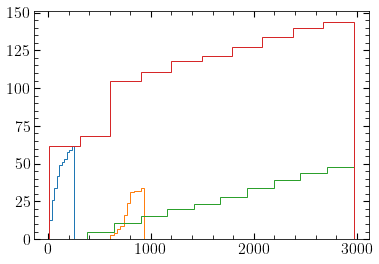

In [116]:
plt.hist(sat_galcen_xyz[MW_membership].value, cumulative=True, histtype='step')
plt.hist(sat_galcen_xyz[M31_membership].value, cumulative=True, histtype='step')
plt.hist(sat_galcen_xyz[LG_membership].value, cumulative=True, histtype='step')
plt.hist(sat_galcen_xyz.value, cumulative=True, histtype='step')

In [129]:
plot = k3d.plot(grid_visible=False,
                camera_auto_fit=False)

#vertices = np.vstack([MW_sat_orbits[:,1], MW_sat_orbits[:,2], MW_sat_orbits[:,3]]).T
for i in range(len(galcen.x)):
    if sat_membership[i] =='MW':
        color = 0xc6884b
    elif sat_membership[i] == 'M31':
        color = 0x3f6bc5
    else: 
        color = 0x3e3a3a
    plt_points = k3d.points([galcen.x.value[i], galcen.y.value[i], galcen.z.value[i]],
                            point_size=30,
                            color=color, name=LV_gal_names[i], group=sat_membership[i])
    plot += plt_points

plt_mw = k3d.points([0,0,0], point_size=280*2, shader='3d',  opacity=0.1)
plt_m31 = k3d.points([galcen.x.value[23], galcen.y.value[23], galcen.z.value[23]], color = 0xc6884b,
                     point_size=280*2, shader='3d',  opacity=0.1)

#plot += plt_line
plot += plt_mw
plot += plt_m31

plot.display()
#plot.camera= [1000, 0, 0,
#              0,0,0,
#              0,0,0]


Output()

In [119]:
k3d.points?